# 04-1. 로지스틱 회귀
1) K-최근접 이웃 분류기로 랜덤 럭키백에 들어간 생선의 확률 계산

In [ ]:
#1
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
#2
#어떤 종류의 생선이 있는지 species 열에서 값 추출
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
#3
#species 열을 타깃으로 만들고 나머지 5개 열은 입력 데이터로 사용
#입력데이터 만듬
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
#4
fish_target = fish['Species']

In [ ]:
#5
#훈련 세트 만듬
#머신러닝에서는 데이터세트 (훈련,테스트) 2개가 필요함
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target, random_state=42)

In [ ]:
#6
#scikitlearn의 standardscaler class를 사용해 훈련세트와 테스트세트를 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
#7
#k-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
#8
# 클래스 확률을 배우는 것이 목적이므로 점수는 잠시 분석 x
# 타깃 데이터에 2개 이상의 (species=7개 종류 넣음) 클래스가 포함된 문제를 다중분류 라고 부름
# 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 알파벳 순으로 정렬됨. pd.unique(fish['species'])로 출력한 결과와 다르게 나옴
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
#9
#test set에 있는 처음 5개 샘플의 타깃값을 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
#10
#테스트세트에 있는 처음 5개 샘플에 대한 확률을 출력해봄
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) #소숫점 네자리 까지 표기, 반올림
#여기서 순서는 print(kn.classes_) 했을때 나온 Bream, Parkki 순서임

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
#11
#만든 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target.iloc[indexes[0]])
# 행,생선종류 순서로 나옴
# 이 샘플의 이웃은 5번째 class인 roach가 1개이고, 3번째 class인 perch가 2개
# 확률로 보면 class 5->1/3=0.3333, class 3->2/3=0.66667 이므로 위에 예측했던 결과와 일치
# 잘 만들어진 모델처럼 보이지만 3개의 최근접 이웃을 사용하기 때문에 당연한 결과였음

52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


2) 로지스틱 회귀

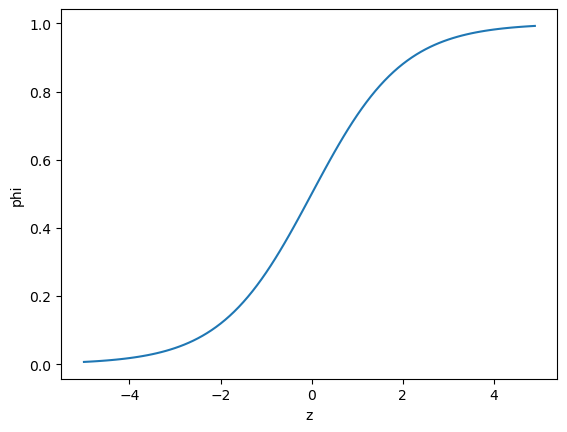

In [ ]:
#12
#시그모이드 그래프
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

#-5~5 사이에 0.1 간격으로 배열 z를 만든 다음 z 위치마다 시그노이드 함수를 계산
# 세로 축 =<0.5 일때 음성클래스, >0.5 일때 양성클래스

In [ ]:
#13
#로지스틱 회귀로 이진 분류 수행하기
char_arr = np.array(['A','B', 'C', 'D','E'])
print(char_arr[[True, False, True, False, False]])
#A,C를 골라내기 위해 A,C 위치에만 True 쓰고 나머지는 False 전달

['A' 'C']


In [ ]:
#14
# 도미와 빙어 행만 골라내기 위해 비교 연산자를 써서 도미와 빙어의 행을 true로 만듬
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
#15
#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
#16
#train_bream_smelt에 있는 처음 5개 sample을 예측
print(lr.predict(train_bream_smelt[:5]))
# 1개 빼고 모두 도미로 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
#17
#train_bream_smelt 에서 처음 5개 sample의 예측 확률 출력
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [ ]:
#18
#위의 결과가 어떤 순서의 행으로 되어있는지 확인
print(lr.classes_)
#16의 결과 보면 두번째 sample이 빙어, 나머지는 도미

['Bream' 'Smelt']


In [27]:
#19
#로지스틱 회귀로 성공적인 이진 분류를 수행했음
#로지스틱 회귀가 학습한 계수 확인
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


- 이 로지스틱 회귀 모델이 학습한 방정식은 다음과 같음 <br>
z = -0.405 x (weight) - 0.576 x (length) = 0.662 x (diagonal) - 1.013 x (height) - 0.731 x (width) - 2.162

In [ ]:
#20
#로지스틱 회귀는 선형 회귀와 비슷함
#LogisticRegression 모델 값으로 z를 계산해 볼 수 있음->decision_function()
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
#처음 5개 sample의 z값 출력

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [ ]:
#21
#이 z 값을 시그모이드 함수에 통과시키면 확률을 알 수 있음
from scipy.special import expit
print(expit(decisions))
#17 출력 값의 두번째 열 값과 동일하게 나옴. 
#즉 decision_function method는 양성 클래스에 대한 z값을 반환

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [ ]:
#22
#로지스틱 회귀로 다중 분류 수행하기
#아까까지는 이진 분류를 수행했는데 7개의 생선을 분류해 보면서 이진 분류와의 차이점 알아봄
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
#훈련, 테스트세트 점수 높고, 과대/과소적합 처럼 값이 치우쳐있지 않음

0.9327731092436975
0.925


In [ ]:
#23
#처음 5개 sample 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
#24
#처음 5개 예측 확률 출력
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) #소숫점 4자리에서 반올림

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [33]:
#25
#첫번째 샘플의 3번째 열 확률이 80%대로 높음, perch에 대한 확률인가?
#클래스 정보를 검색해보니 맞음
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
#26
#선형방정식
print(lr.coef_.shape, lr.intercept_.shape)
#5개의 특성을 사용하므로 (행,배열)로 봤을 때 배열5개, 행 7개. z를 7개나 계산한다는 의미
# 다중분류는 클래스마다 z 값을 하나씩 계산함
#높은 z 값을 출력하는 클래스가 예측 클래스가 됨

(7, 5) (7,)


In [ ]:
#27
#다중분류는 소프트맥스 함수를 사용해서 7개의 z 값을 확률로 변환시킴
#먼저 테스트 세트의 처음 5개 샘플에 대한 z1~z7 값을 구해봄
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [ ]:
#28
#소프트맥스 함수 import 해서 사용
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals=3))
#24와 결과 일치. 실제 결과와 예측 결과가 일치함. 모델 훈련 성공

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
